In [1]:
# %%

from pathlib import Path

import nshtrainer.ll as ll
import rich
import torch
from jmppeft.tasks.finetune import base
from jmppeft.tasks.finetune import dataset_config as DC
from jmppeft.tasks.finetune import energy_forces_base as ef
from jmppeft.tasks.finetune import matbench_discovery as mpd
from typing_extensions import TypeVar

TConfig = TypeVar("TConfig", bound=ll.BaseConfig, infer_variance=True)
base_path = Path("/mnt/datasets/matbench-discovery-traj/megnet-133k-npz/")


def config_from_ckpt(config_cls: type[TConfig], ckpt_path: Path) -> TConfig:
    ckpt = torch.load(ckpt_path, map_location="cpu")
    config = config_cls.model_validate(ckpt["hyper_parameters"])
    return config.reset_()


def update_config_(config: ef.EnergyForcesConfigBase):
    config.train_dataset = DC.matbench_discovery_config(
        base_path,
        "train",
        use_megnet_133k=True,
        use_atoms_metadata=True,
        use_linref=True,
    )
    config.val_dataset = DC.matbench_discovery_config(
        base_path,
        "val",
        use_megnet_133k=True,
        use_atoms_metadata=True,
        use_linref=True,
    )
    config.test_dataset = DC.matbench_discovery_config(
        base_path,
        "test",
        use_megnet_133k=True,
        use_atoms_metadata=True,
        use_linref=True,
    )

    config.batch_size = 1
    config.eval_batch_size = 1

    config.trainer.precision = "32-true"
    config.trainer.accelerator = "cpu"

    config.trainer.actsave = ll.ActSaveConfig()


configs: list[tuple[base.FinetuneConfigBase, type[base.FinetuneModelBase]]] = []

ckpt_path = Path("/mnt/shared/checkpoints/jmp-mptrj/latest_epoch85_step807110.ckpt")
config = config_from_ckpt(mpd.MatbenchDiscoveryConfig, ckpt_path)
update_config_(config)
config.meta["ckpt_path"] = ckpt_path

configs.append((config, mpd.MatbenchDiscoveryModel))

TensorBoard/TensorBoardX not found. Disabling TensorBoardLogger. Please install TensorBoard with `pip install tensorboard` or TensorBoardX with `pip install tensorboardx` to enable TensorBoard logging.
Type checking the following modules: ('jmppeft',)


Loading 'wbm_summary' from cached file at '/root/.cache/matbench-discovery/1.0.0/wbm/2023-12-13-wbm-summary.csv.gz'


/workspaces/ll/src/ll/model/config.py:1898: IdSeedWarning: BaseConfig._rng is None. The generated IDs will not be reproducible. To fix this, call BaseConfig.set_seed(...) before generating any IDs.
  warnings.warn(


: 

In [ ]:
# %%


def run(config: base.FinetuneConfigBase, model_cls: type[base.FinetuneModelBase]):
    model = model_cls(config)
    ckpt = torch.load(config.meta["ckpt_path"], map_location="cpu")
    model.load_state_dict(ckpt["state_dict"])

    trainer = ll.Trainer(config)
    trainer.validate(model)

In [ ]:
# %%


def run(config: base.FinetuneConfigBase, model_cls: type[base.FinetuneModelBase]):
    model = model_cls(config)
    ckpt = torch.load(config.meta["ckpt_path"], map_location="cpu")
    model.load_state_dict(ckpt["state_dict"])

    trainer = ll.Trainer(config)
    trainer.validate(model)

    import rich

    rich.print(model.config.id)

In [ ]:
# %%

runner = ll.Runner(run)
runner.fast_dev_run(configs, n_batches=1024, reset_memory_caches=False)

Fast dev run:   0%|          | 0/1 [00:00<?, ?it/s]

Auto-wrapping run in Trainer context
Using regular backbone


Unrecognized arguments:  dict_keys(['learnable_rbf', 'learnable_rbf_stds', 'unique_basis_per_layer', 'dropout', 'edge_dropout', 'ln_per_layer', 'scale_factor_to_ln'])


Constructed backbone with dlora=None
Freezing 0 parameters (0.00%) out of 220,981,888 total parameters (220,981,888 trainable)
LightningTrainer.__init__ with kwargs={'deterministic': None, 'fast_dev_run': 1024, 'max_epochs': 500, 'min_epochs': None, 'max_steps': -1, 'min_steps': None, 'max_time': '07:00:00:00', 'limit_train_batches': None, 'limit_val_batches': None, 'limit_test_batches': None, 'limit_predict_batches': None, 'overfit_batches': 0.0, 'val_check_interval': None, 'num_sanity_val_steps': None, 'log_every_n_steps': None, 'inference_mode': True, 'callbacks': [<ll.actsave._callback.ActSaveCallback object at 0x7137a366ddd0>, <ll.callbacks.early_stopping.EarlyStopping object at 0x7137a4079590>], 'plugins': [], 'logger': [<lightning.pytorch.loggers.wandb.WandbLogger object at 0x7137a48c91d0>, <lightning.pytorch.loggers.csv_logs.CSVLogger object at 0x7137a3fe58d0>], 'default_root_dir': Path('/workspaces/repositories/jmp-peft/config/relax/lltrainer/nz809rlq'), 'use_distributed_sampl

Validation: |          | 0/? [00:00<?, ?it/s]

No LR scheduler found.


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃         Validate metric          ┃           DataLoader 0           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ val/matbench_discovery/force_mae │       0.05038995295763016        │
│   val/matbench_discovery/y_mae   │        0.8308894634246826        │
└──────────────────────────────────┴──────────────────────────────────┘

nz809rlq

Ran 1 finalizers for Trainer cleanup.


[None]

In [ ]:
# %%

acts = ll.ActLoad.from_latest_version(
    "/workspaces/repositories/jmp-peft/config/relax/lltrainer/nz809rlq/activation"
)
rich.print(acts)

ActLoad(dir=/workspaces/repositories/jmp-peft/config/relax/lltrainer/nz809rlq/activation/0000, 
activations=[LoadedActivation(name='validation.batch', num_activations=1024), 
LoadedActivation(name='validation.pos', num_activations=1024), LoadedActivation(name='validation.natoms', 
num_activations=1024), LoadedActivation(name='validation.edge_index', num_activations=1024), 
LoadedActivation(name='validation.x_F_0', num_activations=1024), LoadedActivation(name='validation.x_E_0', 
num_activations=1024), LoadedActivation(name='validation.h_0', num_activations=1024), 
LoadedActivation(name='validation.m_0', num_activations=1024), LoadedActivation(name='validation.x_F_1', 
num_activations=1024), LoadedActivation(name='validation.x_E_1', num_activations=1024), 
LoadedActivation(name='validation.h_1', num_activations=1024), LoadedActivation(name='validation.m_1', 
num_activations=1024), LoadedActivation(name='validation.x_E_2', num_activations=1024), 
LoadedActivation(name='validation.x_F_2', num_activations=1024), LoadedActivation(name='validation.m_2', 
num_activations=1024), LoadedActivation(name='validation.h_2', num_activations=1024), 
LoadedActivation(name='validation.x_F_3', num_activations=1024), LoadedActivation(name='validation.x_E_3', 
num_activations=1024), LoadedActivation(name='validation.h_3', num_activations=1024), 
LoadedActivation(name='validation.x_E_4', num_activations=1024), LoadedActivation(name='validation.m_3', 
num_activations=1024), LoadedActivation(name='validation.x_F_4', num_activations=1024), 
LoadedActivation(name='validation.h_4', num_activations=1024), LoadedActivation(name='validation.m_4', 
num_activations=1024), LoadedActivation(name='validation.x_E_5', num_activations=1024), 
LoadedActivation(name='validation.x_F_5', num_activations=1024), LoadedActivation(name='validation.h_5', 
num_activations=1024), LoadedActivation(name='validation.x_E_6', num_activations=1024), 
LoadedActivation(name='validation.m_5', num_activations=1024), LoadedActivation(name='validation.x_F_6', 
num_activations=1024), LoadedActivation(name='validation.x_F_final', num_activations=1024), 
LoadedActivation(name='validation.x_E_final', num_activations=1024)])

In [ ]:
# %%

# prefix = "validation.m_"
prefix = "validation.h_"
acts_list = [act for act in acts if act.name.startswith(prefix)]
rich.print(acts_list)

[
    LoadedActivation(name='validation.h_0', num_activations=1024),
    LoadedActivation(name='validation.h_1', num_activations=1024),
    LoadedActivation(name='validation.h_2', num_activations=1024),
    LoadedActivation(name='validation.h_3', num_activations=1024),
    LoadedActivation(name='validation.h_4', num_activations=1024),
    LoadedActivation(name='validation.h_5', num_activations=1024)
]

In [ ]:
# %%

prefix = "validation.m_"
# prefix = "validation.h_"
acts_list = [act for act in acts if act.name.startswith(prefix)]
rich.print(acts_list)

[
    LoadedActivation(name='validation.m_0', num_activations=1024),
    LoadedActivation(name='validation.m_1', num_activations=1024),
    LoadedActivation(name='validation.m_2', num_activations=1024),
    LoadedActivation(name='validation.m_3', num_activations=1024),
    LoadedActivation(name='validation.m_4', num_activations=1024),
    LoadedActivation(name='validation.m_5', num_activations=1024)
]

In [ ]:
# %%

import lovely_numpy as ln
import numpy as np

ln.set_config(repr=ln.lovely)


def process(act: np.ndarray):
    # Take norm of the final axis
    act = np.linalg.norm(act, axis=-1)
    return act


stacked = {
    act.name[len("validation.") :]: process(np.concatenate(act.all_activations()))
    for act in acts_list
}
rich.print(stacked)

{
    'm_0': array[887592] f32 3.4Mb x∈[15.190, 103.037] μ=24.186 σ=7.957,
    'm_1': array[887592] f32 3.4Mb x∈[12.948, 43.058] μ=17.137 σ=2.089,
    'm_2': array[887592] f32 3.4Mb x∈[12.717, 76.183] μ=19.687 σ=4.393,
    'm_3': array[887592] f32 3.4Mb x∈[11.775, 69.150] μ=18.334 σ=3.396,
    'm_4': array[887592] f32 3.4Mb x∈[14.470, 109.082] μ=24.427 σ=4.674,
    'm_5': array[887592] f32 3.4Mb x∈[20.290, 218.912] μ=54.242 σ=27.483
}

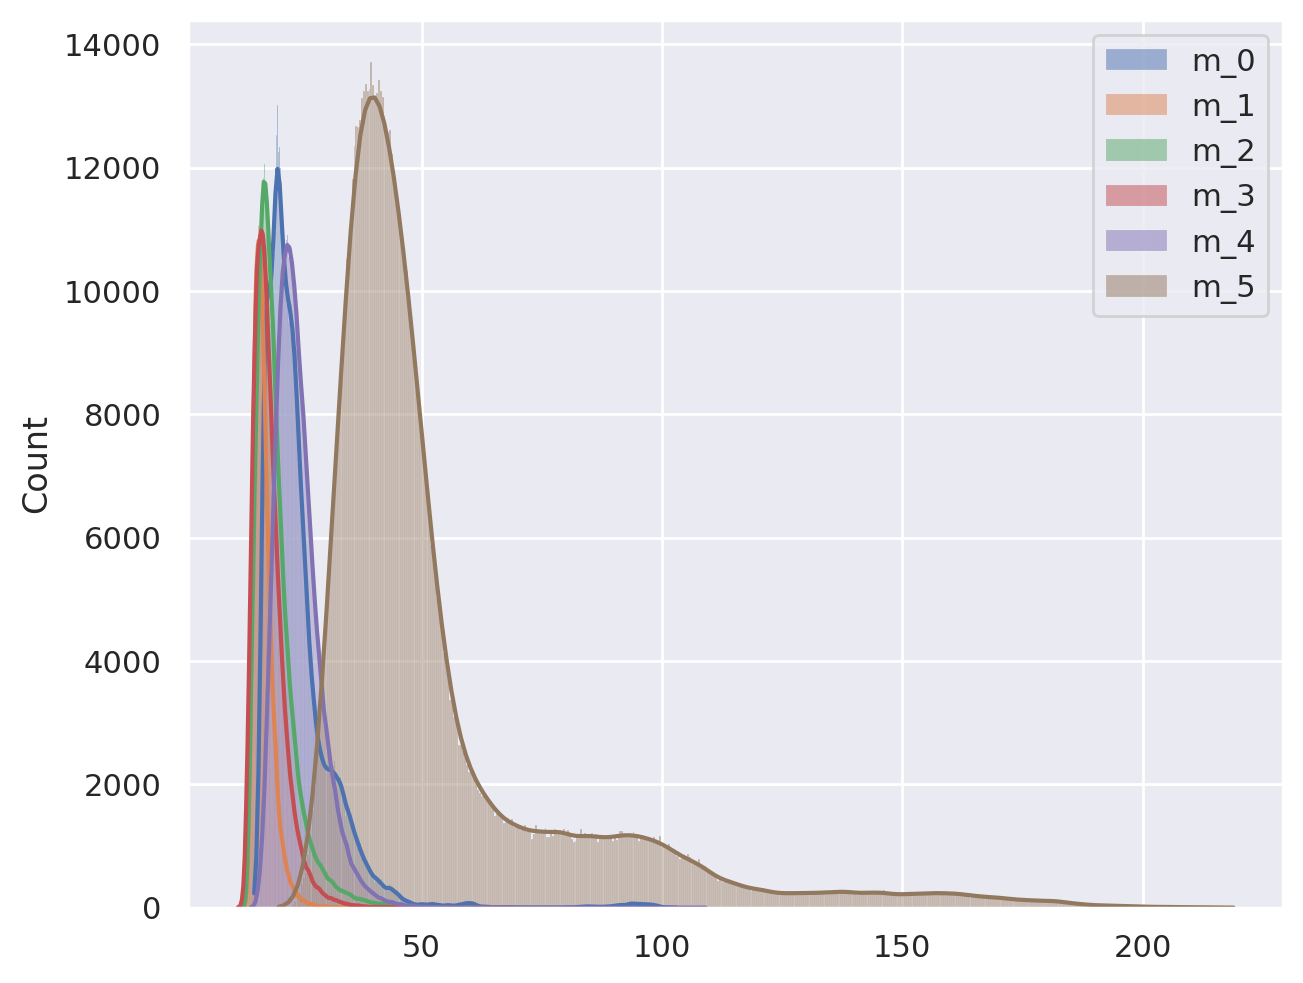

In [ ]:
# %%

# Plot a histogram of the activations, colored by the name of the activation

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

fig, ax = plt.subplots()
for name, m in stacked.items():
    sns.histplot(m, kde=True, label=name, ax=ax)

ax.legend()
plt.show()

In [ ]:
# %%

# prefix = "validation.m_"
prefix = "validation.h_"
acts_list = [act for act in acts if act.name.startswith(prefix)]
rich.print(acts_list)

[
    LoadedActivation(name='validation.h_0', num_activations=1024),
    LoadedActivation(name='validation.h_1', num_activations=1024),
    LoadedActivation(name='validation.h_2', num_activations=1024),
    LoadedActivation(name='validation.h_3', num_activations=1024),
    LoadedActivation(name='validation.h_4', num_activations=1024),
    LoadedActivation(name='validation.h_5', num_activations=1024)
]

In [ ]:
# %%

import lovely_numpy as ln
import numpy as np

ln.set_config(repr=ln.lovely)


def process(act: np.ndarray):
    # Take norm of the final axis
    act = np.linalg.norm(act, axis=-1)
    return act


stacked = {
    act.name[len("validation.") :]: process(np.concatenate(act.all_activations()))
    for act in acts_list
}
rich.print(stacked)

{
    'h_0': array[30392] f32 0.1Mb x∈[4.034, 33.007] μ=16.029 σ=4.368,
    'h_1': array[30392] f32 0.1Mb x∈[8.552, 34.202] μ=17.010 σ=3.364,
    'h_2': array[30392] f32 0.1Mb x∈[11.080, 40.006] μ=18.530 σ=3.267,
    'h_3': array[30392] f32 0.1Mb x∈[13.900, 36.119] μ=22.284 σ=2.841,
    'h_4': array[30392] f32 0.1Mb x∈[16.345, 79.845] μ=31.809 σ=4.683,
    'h_5': array[30392] f32 0.1Mb x∈[11.440, 57.608] μ=28.670 σ=7.319
}

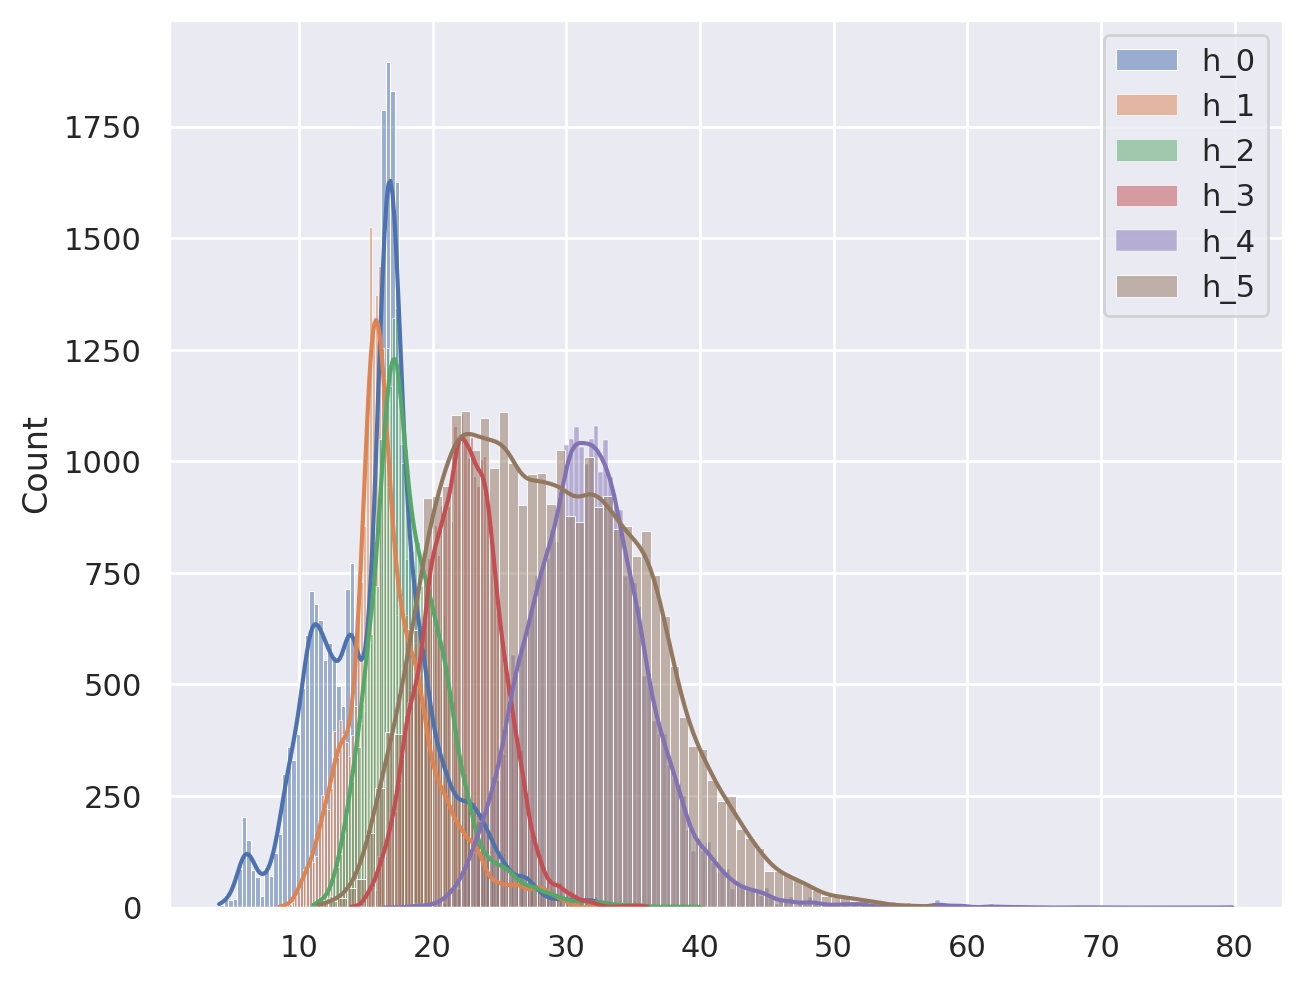

In [ ]:
# %%

# Plot a histogram of the activations, colored by the name of the activation

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

fig, ax = plt.subplots()
for name, m in stacked.items():
    sns.histplot(m, kde=True, label=name, ax=ax)

ax.legend()
plt.show()

In [ ]:
# %%

# prefix = "validation.m_"
# prefix = "validation.h_"
prefix = "validation.x_E_"
acts_list = [act for act in acts if act.name.startswith(prefix)]
rich.print(acts_list)

[
    LoadedActivation(name='validation.x_E_0', num_activations=1024),
    LoadedActivation(name='validation.x_E_1', num_activations=1024),
    LoadedActivation(name='validation.x_E_2', num_activations=1024),
    LoadedActivation(name='validation.x_E_3', num_activations=1024),
    LoadedActivation(name='validation.x_E_4', num_activations=1024),
    LoadedActivation(name='validation.x_E_5', num_activations=1024),
    LoadedActivation(name='validation.x_E_6', num_activations=1024),
    LoadedActivation(name='validation.x_E_final', num_activations=1024)
]

In [ ]:
# %%

import lovely_numpy as ln
import numpy as np

ln.set_config(repr=ln.lovely)


def process(act: np.ndarray):
    # Take norm of the final axis
    act = np.linalg.norm(act, axis=-1)
    return act


stacked = {
    act.name[len("validation.") :]: process(np.concatenate(act.all_activations()))
    for act in acts_list
}
rich.print(stacked)

{
    'x_E_0': array[30392] f32 0.1Mb x∈[4.418, 71.523] μ=14.780 σ=9.273,
    'x_E_1': array[30392] f32 0.1Mb x∈[2.792, 35.607] μ=7.197 σ=4.461,
    'x_E_2': array[30392] f32 0.1Mb x∈[2.451, 64.621] μ=7.781 σ=4.255,
    'x_E_3': array[30392] f32 0.1Mb x∈[3.110, 49.094] μ=6.481 σ=2.958,
    'x_E_4': array[30392] f32 0.1Mb x∈[3.544, 33.232] μ=6.278 σ=1.838,
    'x_E_5': array[30392] f32 0.1Mb x∈[3.742, 74.388] μ=7.527 σ=2.781,
    'x_E_6': array[30392] f32 0.1Mb x∈[2.163, 76.954] μ=4.852 σ=2.284,
    'x_E_final': array[30392] f32 0.1Mb x∈[1.437, 70.318] μ=5.453 σ=4.888
}

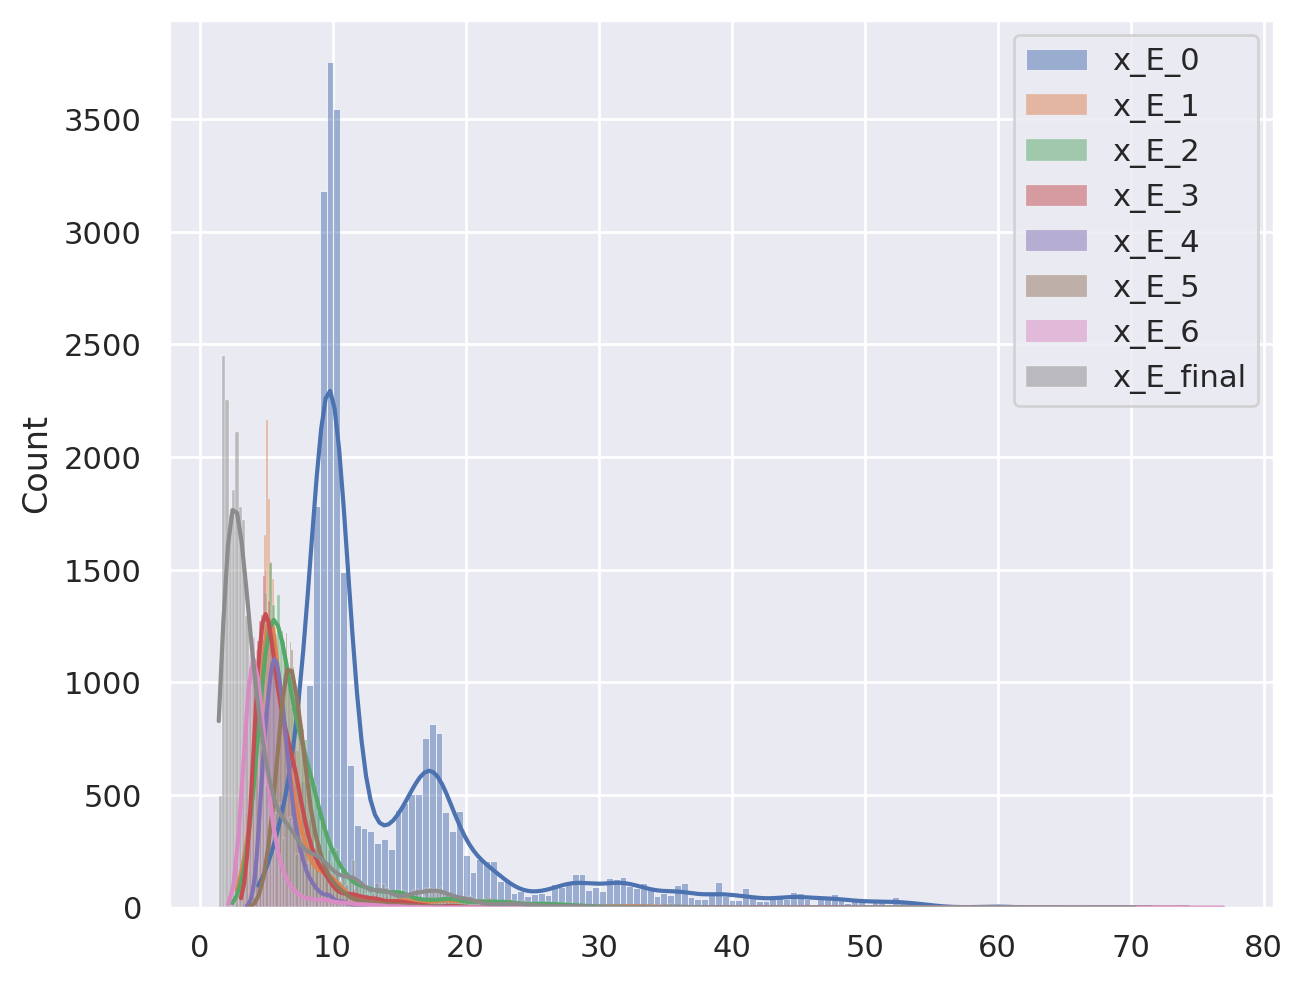

In [ ]:
# %%

# Plot a histogram of the activations, colored by the name of the activation

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

fig, ax = plt.subplots()
for name, m in stacked.items():
    sns.histplot(m, kde=True, label=name, ax=ax)

ax.legend()
plt.show()